<p><h1>Analysing consumption habits</h1></p>

During the pandemic caused by Sars-cov 19🦠 I was in Chile as an inmigrant. I had just arrived on January 17th 2020 at the Capital Santiago with my mother👵, an eldery (74). Furtunately I found a convenient located appartment next to the supermarket 🛒 "Lider" which is the Chilean version of Walmart.

Since the confinement started on March 22th. We decided to go out only once a week to buy groceries, preferably during non-busy hours (around 9am). Since I was unemployed I rigorously controled my budget, and doing so I kept all the receipts from the grocery store, then after almost a year I had 70 receipts of this peculiar 2020.

In the next lines I will show you How did I analysed the data from the groceries store's receipts.

<p><h1>The data</h1></p>
This is how one of those <a href="https://drive.google.com/file/d/1UBuSZwed86JgsYzJH0pmkTx4Lo_oitp1/view?usp=sharing">receipts</a>🧾 looks like. Well, my first approach to extract the data from the receipts was to scan it using th Goggle Drive functionality, and after that, to use google vision API to convert the pdf file to text and this was the <a href="https://drive.google.com/file/d/10v3jhFpseSjfe4ou2N1j2Wkr5FRd2wmK/view?usp=sharing" >result</a>. I asked for help on regular expressions and my friend @madacol helped me with this <a href="https://regex101.com/r/cr2Acv/3/">regex</a> that was able to detect 4 important fields (product_id, quantity, product_description and unit_price). But due to the format it only detected 26 out of 30 items in the receipt.

In order to find a solution to this issue I found that there was an option to download the receipt in a digital format through their website. So this was actually what I did. I manually downloaded the receipts. If anybody knows how to do it automatically please let me know. So, here you will find the <a href="https://drive.google.com/file/d/1cl0NC4IE9-H6zNncszAjTW1GglVdRhB-/view?usp=sharing">70 receipts</a>. I copied and pasted the content of all pdf files and using a regexp extracted the previously mentioned fields and put them in into excel to finally get this <a href= "https://drive.google.com/file/d/1O1gUBz0_aSfuZKJR7gGhGkklHe-wm9UX/view?usp=sharing">dataset</a>.

### Read a CSV file


In [17]:
import pandas as pd
from datetime import datetime
df = pd.read_csv('DATA.csv', encoding = "ISO-8859-1") #, encoding= "utf-8" 

In [18]:
df.head()

,date (m/d/y),codigo,descripcion,cantidad,precio_unitario,total,boleta_electronica,local,caja,dia,mes,año,trans_n,cajero,hora,total_articulos,atendido_por
0,1/17/2020,7798160461771,BOLSA PLA GR,1.000,990,990,1490873643,682,12,17,1,2020,63,67,11:52,18,XIMENA QUIROZ
1,1/17/2020,400006849151,MUG IVORY,1.000,990,990,1490873643,682,12,17,1,2020,63,67,11:52,18,XIMENA QUIROZ
2,1/17/2020,2000140000005,PLATANO,0.845,920,777,1525186435,682,6,17,1,2020,71,133,15:25,16,CLAUDIA JORQUERA
3,1/17/2020,2000040000006,CEBOLLA GRAN,0.580,850,493,1525186435,682,6,17,1,2020,71,133,15:25,16,CLAUDIA JORQUERA
4,1/17/2020,7802655002230,HARINA S/POL,1.000,800,800,1490873643,682,12,17,1,2020,63,67,11:52,18,XIMENA QUIROZ


In [19]:
df.tail()

,date (m/d/y),codigo,descripcion,cantidad,precio_unitario,total,boleta_electronica,local,caja,dia,mes,año,trans_n,cajero,hora,total_articulos,atendido_por
1513,12/28/2020,7804622260063,ZAPALLO CAMO,1.0,1390,1390,1680354484,682,22,28,12,2020,145,493,18:29,27,cajero exrerno
1514,12/28/2020,7801420130130,ARROZ INTEGR,1.0,1280,1280,1680354484,682,22,28,12,2020,145,493,18:29,27,cajero exrerno
1515,12/28/2020,7804930000306,LIMP CREMA,1.0,1230,1230,1680354484,682,22,28,12,2020,145,493,18:29,27,cajero exrerno
1516,12/28/2020,7801220001203,ENSALADA MIX,1.0,1150,1150,1680354484,682,22,28,12,2020,145,493,18:29,27,cajero exrerno
1517,12/28/2020,7801365000284,CHAMPINON BA,1.0,1090,1090,1680354484,682,22,28,12,2020,145,493,18:29,27,cajero exrerno


In [20]:
df.columns

Index(['date (m/d/y)', 'codigo', 'descripcion', 'cantidad', 'precio_unitario',
       'total', 'boleta_electronica', 'local', 'caja', 'dia', 'mes', 'año',
       'trans_n', 'cajero', 'hora', 'total_articulos', 'atendido_por'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date (m/d/y)        1518 non-null   datetime64[ns]
 1   codigo              1518 non-null   int64         
 2   descripcion         1518 non-null   object        
 3   cantidad            1518 non-null   float64       
 4   precio_unitario     1518 non-null   int64         
 5   total               1518 non-null   int64         
 6   boleta_electronica  1518 non-null   int64         
 7   local               1518 non-null   int64         
 8   caja                1518 non-null   int64         
 9   dia                 1518 non-null   int64         
 10  mes                 1518 non-null   int64         
 11  año                 1518 non-null   int64         
 12  trans_n             1518 non-null   int64         
 13  cajero              1518 non-null   int64       

In [22]:
df['date (m/d/y)'] =  pd.to_datetime(df['date (m/d/y)'] )

In [23]:
df['date (m/d/y)'] =  pd.to_datetime(df['date (m/d/y)'], format='%d/%m/%Y' )

### 1.How much money (CLP) did I spend on groceries in 2020?


In [24]:
df['total'].sum()

2799956

### 2.Which is the most expensive item I have purchased?


In [25]:
df.loc[(df['precio_unitario'] == df['precio_unitario'].max())]


,date (m/d/y),codigo,descripcion,cantidad,precio_unitario,total,boleta_electronica,local,caja,dia,mes,año,trans_n,cajero,hora,total_articulos,atendido_por
1063,2020-09-21,7802502113089,AUDIF. GAMER,1.0,22990,22990,501305190,682,35,21,9,2020,2,64,8:44,1,VENDEDORINTEGRAL TUR


### 3. Which are the items I purchased most often?

In [26]:
df['descripcion'].value_counts()[0:10] # Based on the product description


PLATANO         43
YOGHURT BOLS    40
HUEVO GRANDE    36
PALTA HASS      25
POLLO ENTERO    25
NARANJA 1.5     23
CILANTRO BOL    23
CHAMPINON BA    21
ATUN LOMITO     21
TOMATES         21
Name: descripcion, dtype: int64

In [27]:
df.loc[df['codigo']== '2000140000005.0'][0:1]

,date (m/d/y),codigo,descripcion,cantidad,precio_unitario,total,boleta_electronica,local,caja,dia,mes,año,trans_n,cajero,hora,total_articulos,atendido_por


### 4. How much did I spent each month?


<AxesSubplot:xlabel='date (m/d/y)'>

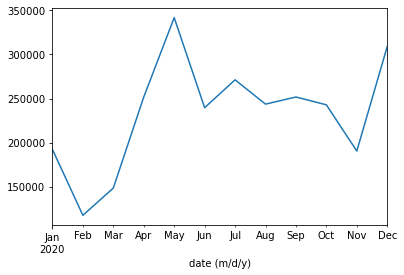

In [31]:
df.index = pd.to_datetime(df['date (m/d/y)'],format='%d/%m/%Y')
df.groupby(by=[df.index.month])
df['total'].groupby(pd.Grouper(freq="M")).sum()

df['total'].groupby(pd.Grouper(freq="M")).sum().plot()


### 5. In which day of the week did I purchased most items?


In [32]:
# Let's break the date field to month,day,week,dayofweek,

# df['MES']= df['FECHA EMISION'].dt.month
# df['DIA']= df['FECHA EMISION'].dt.day
df['#SEMANA'] = df['date (m/d/y)'].dt.week
df['DIA_DE_SEMANA'] = df['date (m/d/y)'].dt.dayofweek


<ipython-input-32-bef1163e2dcd>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['#SEMANA'] = df['date (m/d/y)'].dt.week


In [33]:
dw_mapping={
    0: 'Lunes', 
    1: 'Martes', 
    2: 'Miércoles', 
    3: 'Jueves', 
    4: 'Viernes',
    5: 'Sábado', 
    6: 'Domingo'
}

In [34]:
df['DIA_DE_SEMANA'].map(dw_mapping).value_counts()


Viernes      779
Martes       347
Lunes        160
Sábado       118
Miércoles     60
Domingo       30
Jueves        24
Name: DIA_DE_SEMANA, dtype: int64

### 7. How many times did I go to the supermarket?

In [36]:
df['date (m/d/y)'].nunique() # Determine how many diferent days did I went to the grocery store


66

### 8. In which day of the week did I purchased most often?


In [38]:
# to now how many items per day add ,'count' to agg parameters
df['date (m/d/y)'].groupby(df['DIA_DE_SEMANA'].map(dw_mapping)).agg(['nunique'])

,nunique
DIA_DE_SEMANA,
Domingo,3
Jueves,4
Lunes,10
Martes,13
Miércoles,5
Sábado,5
Viernes,26


### 9. How many different products have I purchased?


In [39]:
df['codigo'].nunique() # Based on the product code (SKU)


610

### 9. How much have I spent in the most frequent purchased item per month?


In [40]:
# First I will find the most frequent purchased item
most_frequent_item = df['codigo'].value_counts()
most_frequent_item

2000140000005    42
7804144000468    35
2030300000002    25
7801365000284    21
2000010000005    21
                 ..
7802920202105     1
400006989017      1
400006968531      1
7806545000306     1
7802351000462     1
Name: codigo, Length: 610, dtype: int64

In [44]:
# Let's see what item corresponds to SKU 2000140000005         
df.loc[df['codigo']==2000140000005].total.sum()

46073

### 10. How much have changed the price of the most frequent purchased item?


<AxesSubplot:xlabel='date (m/d/y)'>

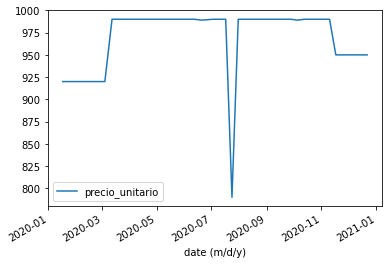

In [45]:
df.loc[(df['descripcion'] =='PLATANO')].plot(x='date (m/d/y)', y='precio_unitario')


### 11. How much did I spent on weekly basis?


<AxesSubplot:xlabel='date (m/d/y)'>

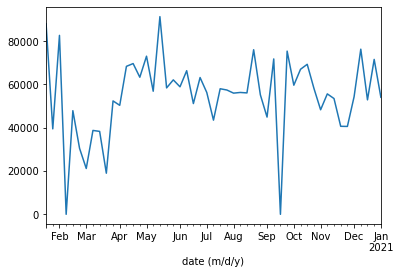

In [46]:
df['total'].groupby(pd.Grouper(freq="W")).sum().plot()


In [47]:
df['total'].groupby(pd.Grouper(freq="W")).sum()


date (m/d/y)
2020-01-19    87998
2020-01-26    39475
2020-02-02    82660
2020-02-09        0
2020-02-16    47876
2020-02-23    30485
2020-03-01    21172
2020-03-08    38749
2020-03-15    38307
2020-03-22    18990
2020-03-29    52386
2020-04-05    50348
2020-04-12    68355
2020-04-19    69641
2020-04-26    63328
2020-05-03    73047
2020-05-10    56865
2020-05-17    91316
2020-05-24    58399
2020-05-31    62107
2020-06-07    58906
2020-06-14    66342
2020-06-21    51165
2020-06-28    63187
2020-07-05    56278
2020-07-12    43503
2020-07-19    58003
2020-07-26    57425
2020-08-02    55983
2020-08-09    56292
2020-08-16    56085
2020-08-23    76033
2020-08-30    55221
2020-09-06    44918
2020-09-13    71779
2020-09-20        0
2020-09-27    75387
2020-10-04    59643
2020-10-11    67005
2020-10-18    69300
2020-10-25    58216
2020-11-01    48297
2020-11-08    55634
2020-11-15    53483
2020-11-22    40660
2020-11-29    40600
2020-12-06    54320
2020-12-13    76284
2020-12-20    52879
2020-12

### Sum the money spent on a specific item


In [52]:
df[df['descripcion'].str.contains('TOMATES')].total.sum()#.df['Precio Total'].sum()


42459